<a href="https://colab.research.google.com/github/hoanguyen071710/Customer-segmentaion/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
path = '/content/drive/MyDrive/Python HCM/Customer Segmentation'

In [ ]:
import os
os.chdir(path)

In [ ]:
os.listdir()

['E-Commerce Data.csv']

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
data = pd.read_csv("E-Commerce Data.csv", encoding = 'cp1252')
#Data hoa don, invoice, phan loai nhom khach hang dua tren hoa don
#encoding: khi file duoc luu ma nao, can duoc encode bang ma do de doc file
print(data.shape)
display(data.head())

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# Dataset has negative values in Quantity and UnitPrice. remove those entries from dataset
df = data[(data.Quantity > 0)]
# Loc gtri duong
df = df[(df.UnitPrice > 0)]

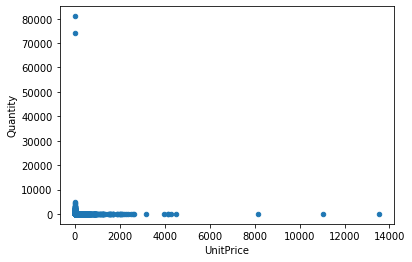

In [ ]:
plot = df.plot.scatter('UnitPrice', 'Quantity')

In [ ]:
col  = "Quantity"
dataValues = df[col].values

Q1, Q2, Q3 = np.quantile(dataValues, 0.25), np.quantile(dataValues, 0.5), np.quantile(dataValues, 0.75) 
IQR = Q3 - Q1
Conf_Value = 1.5
LowerBound_Qty = Q1 - Conf_Value*IQR
UpperBound_Qty = Q3 + Conf_Value*IQR
print(f"{col} : LowerBound = {LowerBound_Qty} and UpperBound = {UpperBound_Qty}")

Quantity : LowerBound = -12.5 and UpperBound = 23.5


In [ ]:
#Tim bat thuong
OutlierDF = df[df[col] > UpperBound_Qty].copy()
NormalDF = df[df[col] <= UpperBound_Qty].copy()

display(OutlierDF.head())
print(OutlierDF.shape)
display(NormalDF.head())
print(NormalDF.shape)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583.0,France
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583.0,France
30,536370,21883,STARS GIFT TAPE,24,12/1/2010 8:45,0.65,12583.0,France
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,12/1/2010 8:45,0.85,12583.0,France


(56363, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


(473741, 8)


In [ ]:
# Big Data ==> Say No this approach
# item = OutlierDF.loc[31, "Description"]
# np.mean(NormalDF[NormalDF["Description"] == item]["Quantity"])


MeanByDescGroup = NormalDF.groupby('Description').mean()
display(MeanByDescGroup)

,Quantity,UnitPrice,CustomerID
Description,,,
4 PURPLE FLOCK DINNER CANDLES,3.512195,2.455366,16203.615385
50'S CHRISTMAS GIFT BAG LARGE,10.093220,1.444831,15389.897959
DOLLY GIRL BEAKER,5.608187,1.518889,14860.623077
I LOVE LONDON MINI BACKPACK,2.929412,4.637059,15634.537313
I LOVE LONDON MINI RUCKSACK,1.000000,4.150000,14646.000000
...,...,...,...
ZINC T-LIGHT HOLDER STARS SMALL,9.121495,0.975794,15165.418994
ZINC TOP 2 DOOR WOODEN SHELF,1.083333,21.094167,14983.777778
ZINC WILLIE WINKIE CANDLE STICK,7.145228,1.114647,15240.509202


In [ ]:
QuantityMeanDict = MeanByDescGroup[col]
print(QuantityMeanDict)

Description
 4 PURPLE FLOCK DINNER CANDLES       3.512195
 50'S CHRISTMAS GIFT BAG LARGE      10.093220
 DOLLY GIRL BEAKER                   5.608187
 I LOVE LONDON MINI BACKPACK         2.929412
 I LOVE LONDON MINI RUCKSACK         1.000000
                                      ...    
ZINC T-LIGHT HOLDER STARS SMALL      9.121495
ZINC TOP  2 DOOR WOODEN SHELF        1.083333
ZINC WILLIE WINKIE  CANDLE STICK     7.145228
ZINC WIRE KITCHEN ORGANISER          1.875000
ZINC WIRE SWEETHEART LETTER TRAY     2.681818
Name: Quantity, Length: 3959, dtype: float64


In [ ]:
# Tham so truyen vao map la tu dien,series
OutlierDF['ImputedQuantity'] = OutlierDF['Description'].map(QuantityMeanDict)

display(OutlierDF.head())
print(OutlierDF.shape)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ImputedQuantity
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom,10.113449
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583.0,France,3.735332
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583.0,France,4.345560
30,536370,21883,STARS GIFT TAPE,24,12/1/2010 8:45,0.65,12583.0,France,7.698113
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,12/1/2010 8:45,0.85,12583.0,France,5.213115


(56363, 9)


In [ ]:
print('Before Update : ',df[col].max())
df.loc[OutlierDF.index,col] = OutlierDF['ImputedQuantity']
print('After Update : ',df[col].max())

Before Update :  80995
After Update :  23.0


In [ ]:
col = 'UnitPrice'
dataValues = df[col].values

Q1, Q2, Q3 = np.quantile(dataValues, 0.25), np.quantile(dataValues, 0.5), np.quantile(dataValues, 0.75) 
IQR = Q3 - Q1
Conf_Value = 3.0
LowerBound_UnitPrice = Q1 - Conf_Value*IQR
UpperBound_UnitPrice = Q3 + Conf_Value*IQR
print(f"{col} : LowerBound = {LowerBound_UnitPrice} and UpperBound = {UpperBound_UnitPrice}")

UnitPrice : LowerBound = -7.390000000000001 and UpperBound = 12.77


In [ ]:
OutlierDF = df[df[col] > UpperBound_UnitPrice].copy()
NormalDF = df[df[col] <= UpperBound_UnitPrice].copy()
display(OutlierDF.head())
print(OutlierDF.shape)
display(NormalDF.head())
print(NormalDF.shape)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3.0,12/1/2010 8:45,18.00,12583.0,France
151,536382,22839,3 TIER CAKE TIN GREEN AND CREAM,2.0,12/1/2010 9:45,14.95,16098.0,United Kingdom
152,536382,22838,3 TIER CAKE TIN RED AND CREAM,2.0,12/1/2010 9:45,14.95,16098.0,United Kingdom
153,536382,22783,SET 3 WICKER OVAL BASKETS W LIDS,4.0,12/1/2010 9:45,16.95,16098.0,United Kingdom
168,536385,22783,SET 3 WICKER OVAL BASKETS W LIDS,1.0,12/1/2010 9:56,19.95,17420.0,United Kingdom


(12204, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


(517900, 8)


In [ ]:
MeanByDescGroup = NormalDF.groupby("Description").mean()
display(MeanByDescGroup.head())

,Quantity,UnitPrice,CustomerID
Description,,,
4 PURPLE FLOCK DINNER CANDLES,3.512195,2.455366,16203.615385
50'S CHRISTMAS GIFT BAG LARGE,10.093220,1.426589,15357.770642
DOLLY GIRL BEAKER,5.608187,1.502123,14825.652174
I LOVE LONDON MINI BACKPACK,2.929412,4.611364,15565.128571
I LOVE LONDON MINI RUCKSACK,1.000000,4.150000,14646.000000


In [ ]:
UnitMeanDict = MeanByDescGroup[col]
print(QuantityMeanDict)

Description
 4 PURPLE FLOCK DINNER CANDLES       3.512195
 50'S CHRISTMAS GIFT BAG LARGE      10.093220
 DOLLY GIRL BEAKER                   5.608187
 I LOVE LONDON MINI BACKPACK         2.929412
 I LOVE LONDON MINI RUCKSACK         1.000000
                                      ...    
ZINC T-LIGHT HOLDER STARS SMALL      9.121495
ZINC TOP  2 DOOR WOODEN SHELF        1.083333
ZINC WILLIE WINKIE  CANDLE STICK     7.145228
ZINC WIRE KITCHEN ORGANISER          1.875000
ZINC WIRE SWEETHEART LETTER TRAY     2.681818
Name: Quantity, Length: 3959, dtype: float64


In [ ]:
OutlierDF["ImputedUnitPrice"] = OutlierDF["Description"].map(UnitMeanDict)

display(OutlierDF.head())
print(OutlierDF.shape)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ImputedUnitPrice
45,536370,POST,POSTAGE,3.0,12/1/2010 8:45,18.00,12583.0,France,3.626316
151,536382,22839,3 TIER CAKE TIN GREEN AND CREAM,2.0,12/1/2010 9:45,14.95,16098.0,United Kingdom,12.246364
152,536382,22838,3 TIER CAKE TIN RED AND CREAM,2.0,12/1/2010 9:45,14.95,16098.0,United Kingdom,12.403750
153,536382,22783,SET 3 WICKER OVAL BASKETS W LIDS,4.0,12/1/2010 9:45,16.95,16098.0,United Kingdom,8.516250
168,536385,22783,SET 3 WICKER OVAL BASKETS W LIDS,1.0,12/1/2010 9:56,19.95,17420.0,United Kingdom,8.516250


(12204, 9)


In [ ]:
print('Before Update : ',df[col].max())
df.loc[OutlierDF.index,col] = OutlierDF['ImputedUnitPrice']
print('After Update : ',df[col].max())

Before Update :  13541.33
After Update :  12.75


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,527673.000000,528980.000000,397884.000000
mean,4.762795,3.040324,15294.423453
std,4.272024,2.685817,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,6.261745,4.130000,16795.000000
max,23.000000,12.750000,18287.000000


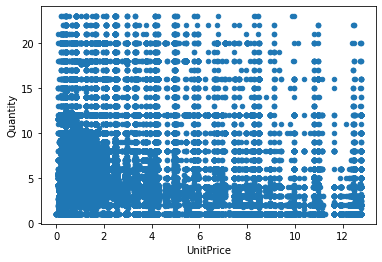

In [ ]:
plot = df.plot.scatter('UnitPrice', 'Quantity')

In [ ]:
# Customer column has 131591 null values. Customer Id is unique values since we cant replace with any other values, hence remove it from the dataset
df=df.dropna(how = 'any', axis = 'rows')
df.shape

(394509, 8)

In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


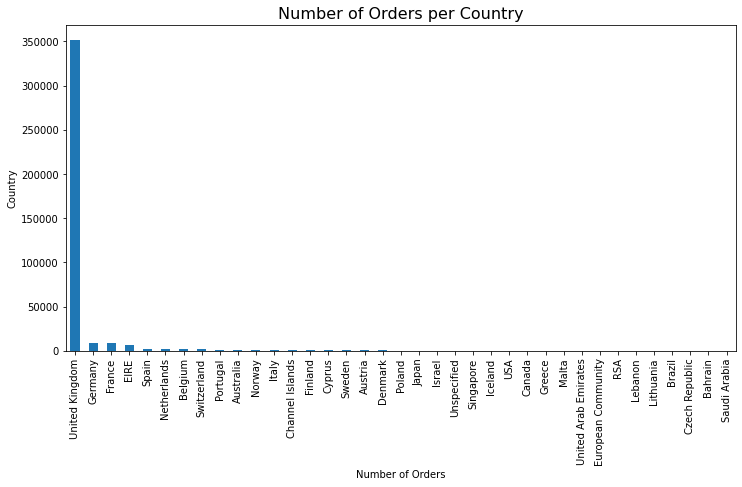

In [ ]:
ord_cnty = df.groupby('Country')['InvoiceNo'].count().sort_values(ascending=False)
#Quan tam nhung quoc gia co hoa don nhieu nhat
#Plot
plt.figure(figsize=(12,6))
ord_cnty.plot.bar()
plt.xlabel('Number of Orders')
plt.ylabel('Country')
plt.title('Number of Orders per Country', fontsize=16)
plt.show()

In [ ]:
df = df[df["Country"] == "United Kingdom"]
df.shape


(351424, 9)

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [ ]:
#Gom nhom theo customer, gia tri quantity va UnitPrice
#Khi buoc vao buoc may hoc se reset index
#agg: tinh tong cot quantity va UnitPrice theo customerID
dfg = df.groupby(by=['CustomerID'])['Quantity','TotalPrice'].agg({'Quantity':'sum','TotalPrice':'sum'}).reset_index()
#inplace la thay truc tiep vao df
dfg.rename(columns={'Quantity':'Total_Quantity','TotalPrice' : 'Total_Amount'},inplace=True)
dfg.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,CustomerID,Total_Quantity,Total_Amount
0,12346.0,6.492891,6.752607
1,12747.0,810.123748,2418.363854
2,12748.0,13595.986641,23015.072684
3,12749.0,1157.233594,3824.054345
4,12820.0,507.263014,845.877764


In [ ]:
#chuan hoa di std lon

#iloc: lay tat ca. [1,2] la cot 1, cot 2. Do xai iloc phai ghi chi so
X = dfg.iloc[:, [1, 2]].values
# Feature Scaling
# StandardScaler = (x=mean)/std
sc_X = StandardScaler()
X= sc_X.fit_transform(X)
print(X)

[[-0.55263484 -0.53046568]
 [ 0.38859055  0.72247606]
 [15.36359887 11.42340313]
 ...
 [-0.48801442 -0.44769651]
 [ 1.07594946  0.55261905]
 [ 0.05533373 -0.13558747]]


Text(0, 0.5, 'wcss: sum of dist. of sample to their closest cluster center')

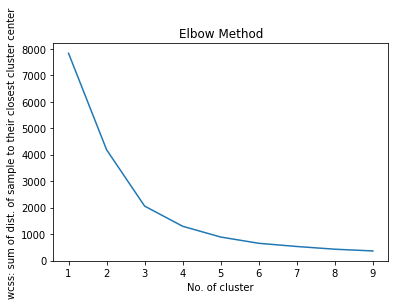

In [ ]:
wcss=[]
for n_clusters in range(1,10):
    kmeans=KMeans(n_clusters=n_clusters,init='k-means++',)
    #KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    clusters = kmeans.predict(X)
plt.plot(range(1,10),wcss)
plt.title('Elbow Method')
plt.xlabel('No. of cluster')
plt.ylabel('wcss: sum of dist. of sample to their closest cluster center' )

In [ ]:
# Fitting K-Means to the dataset
#lap 3 nhom khach hang
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

In [ ]:
np.unique(y_kmeans)

array([0, 1, 2], dtype=int32)

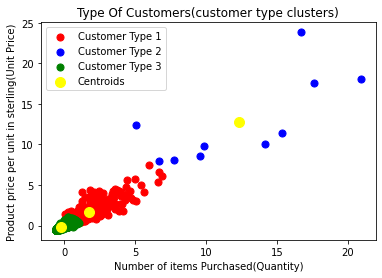

In [ ]:
# Ve va phan mau theo cac y_means
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Customer Type 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Customer Type 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Customer Type 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Type Of Customers(customer type clusters)')
plt.xlabel('Number of items Purchased(Quantity)')
plt.ylabel('Product price per unit in sterling(Unit Price)')
plt.legend()
plt.show()